In [23]:
import shutil
import torch
import torch.nn as nn
import numpy as np
import sys
import os 
import torchvision
torch.manual_seed(100)
np.random.seed(100)
import compress_entropy
import generateCompressionImages
from torch.cuda.amp import autocast
from torch.cuda.amp import GradScaler
from JPEGAndEntropyEncoding import *

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = compress_entropy.Compress().to(device).to(memory_format=torch.channels_last)

#model.load_state_dict(torch.load("./FirstRun/Best/Bestbest_model.pt")['state_dict'])
model.load_state_dict(torch.load("./CE_L1_15/Checkpoints/CE_L1_15_22_checkpoint.pt")['state_dict'])

<All keys matched successfully>

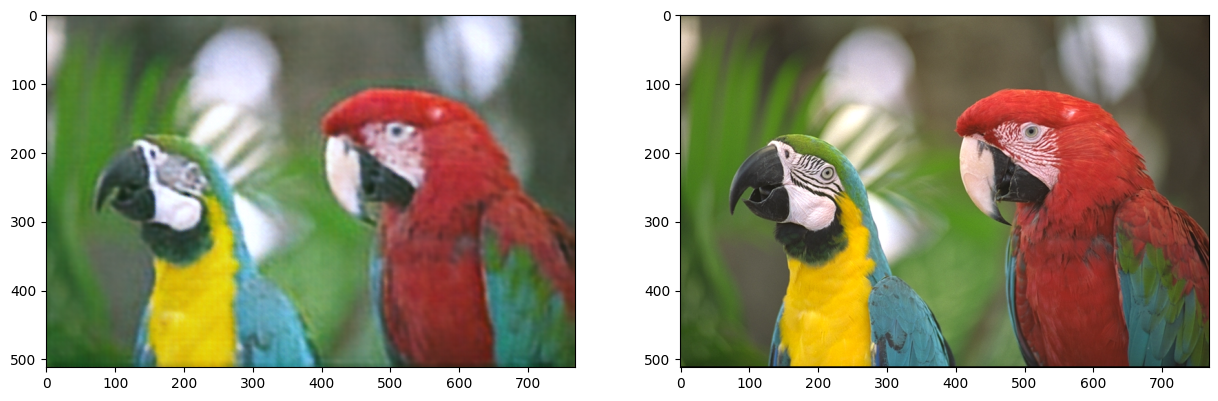

In [29]:
model1 = compress_entropy.Compress().to(device).to(memory_format=torch.channels_last)
model2 = compress_entropy.Compress().to(device).to(memory_format=torch.channels_last)

path_to_image = "../../Data/Kodak/kodim23.png"

image = torchvision.io.image.read_image(path_to_image).permute(1,2,0).to(device="cuda", dtype=torch.float32)

image = image.permute(2,0,1)

#model.load_state_dict(torch.load("./FirstRun/Best/Bestbest_model.pt")['state_dict'])
model1.load_state_dict(torch.load("./CE_L1_2/Checkpoints/CE_L1_2_23_checkpoint.pt")['state_dict'])
model2.load_state_dict(torch.load("./CE_L1_15/Checkpoints/CE_L1_15_22_checkpoint.pt")['state_dict'])
from matplotlib import pyplot as plt

b = image
a = model2(torch.multiply(torch.add(torch.unsqueeze(image,0),-128),1/128))

a = torch.squeeze(a)
a = a.permute(1,2,0)
a = torch.add(torch.multiply(a,128), 128)
a = a.detach().cpu().numpy()
np.clip(a, a_min=0, a_max=255, out=a)
a = np.rint(a)
a = a.astype(np.uint8)

b = torch.squeeze(b)
b = b.permute(1,2,0)
b = b.detach().cpu().numpy()
np.clip(b, a_min=0, a_max=255, out=b)
b = np.rint(b)
b = b.astype(np.uint8)


f, ax = plt.subplots(1,2,figsize=(15, 30))
ax[0].imshow(a)
ax[1].imshow(b)
plt.show()

In [25]:
a = model2.encode(torch.multiply(torch.add(torch.unsqueeze(image,0),-128),1/128))




image,torch.multiply(torch.add(torch.unsqueeze(image,0),-128),1/128)

(tensor([[[116., 117., 120.,  ...,  46.,  46.,  47.],
          [122., 122., 123.,  ...,  47.,  47.,  46.],
          [126., 126., 127.,  ...,  47.,  46.,  46.],
          ...,
          [ 61.,  62.,  65.,  ...,  59.,  51.,  43.],
          [ 61.,  61.,  62.,  ...,  57.,  48.,  46.],
          [  0.,   0.,   0.,  ...,   0.,   0.,   0.]],
 
         [[116., 117., 120.,  ...,  40.,  40.,  41.],
          [119., 119., 120.,  ...,  41.,  41.,  40.],
          [123., 123., 124.,  ...,  41.,  40.,  40.],
          ...,
          [ 85.,  86.,  89.,  ...,  73.,  64.,  56.],
          [ 85.,  85.,  86.,  ...,  70.,  62.,  59.],
          [  0.,   0.,   0.,  ...,   0.,   0.,   0.]],
 
         [[ 88.,  89.,  92.,  ...,  29.,  29.,  31.],
          [ 92.,  92.,  93.,  ...,  31.,  31.,  29.],
          [ 94.,  94.,  95.,  ...,  31.,  29.,  29.],
          ...,
          [ 32.,  33.,  36.,  ...,  38.,  32.,  24.],
          [ 29.,  32.,  33.,  ...,  35.,  27.,  25.],
          [  0.,   0.,   0.,  .

In [26]:
a
a.shape,a

((1, 512, 16, 24),
 array([[[[-1,  0,  0, ..., -7,  3,  1],
          [ 3,  5,  1, ..., -2,  1, -2],
          [ 2,  5,  1, ...,  2,  1, -1],
          ...,
          [ 3,  3,  2, ..., -1,  1,  2],
          [ 5,  3,  3, ...,  1,  1,  0],
          [ 6,  2,  3, ..., -1,  1, -2]],
 
         [[ 1, -1, -1, ...,  0, -2,  0],
          [ 7,  1,  0, ...,  2, -3, -2],
          [ 5,  0, -1, ...,  2, -1, -1],
          ...,
          [-2, -1,  1, ...,  4,  5,  7],
          [-3,  0,  0, ...,  5,  5,  5],
          [ 2,  4,  4, ..., 11,  7,  8]],
 
         [[ 4,  6,  0, ...,  9,  0,  2],
          [ 3,  4,  1, ...,  6, -1,  0],
          [ 1, -2,  0, ...,  4, -1,  0],
          ...,
          [ 1,  0,  0, ...,  2, -1,  3],
          [ 1,  0,  0, ...,  1,  4,  1],
          [ 1,  3,  4, ...,  9,  6,  6]],
 
         ...,
 
         [[ 3, -4, -2, ..., -2, -3, -1],
          [ 7, -1,  0, ..., -1, -3,  1],
          [ 3,  0,  0, ...,  0, -2, -1],
          ...,
          [-3,  0,  0, ..., -2,  2,

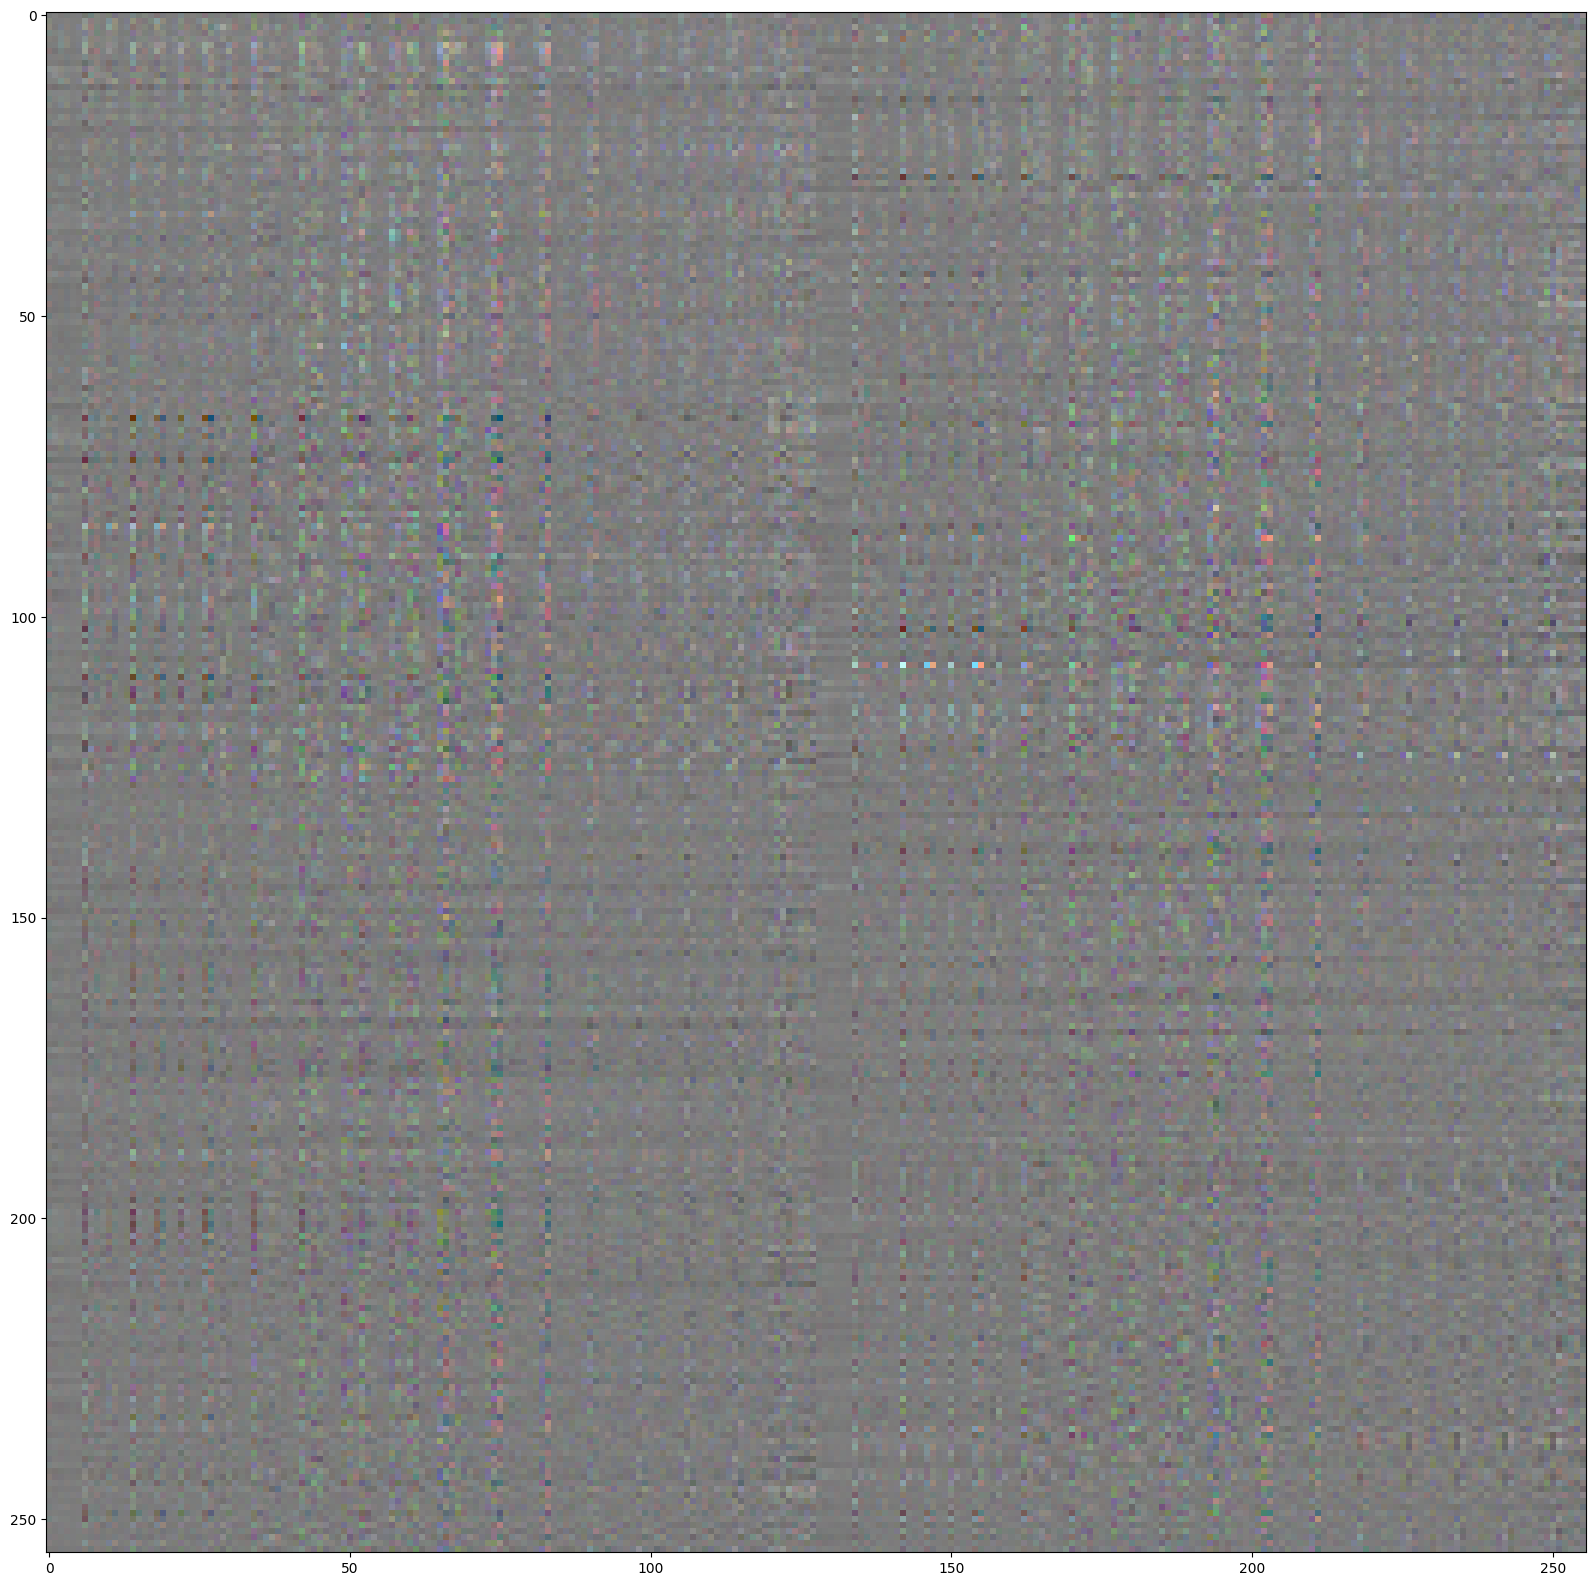

In [27]:

a_new = (a - a.min()) / (a.max() - a.min()) 
plt.figure(figsize=(20,20))
plt.imshow(a_new.reshape(256,256,3))

plt.show()
         